In [40]:
# import required libraries

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import statistics
import plotly.express as px
import researchpy as rp
import pylab
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy.stats import kstest
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportion_confint
from IPython.display import Markdown, display
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, roc_auc_score, classification_report, log_loss

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matches = pd.read_csv("matches_seriea_v2.csv", index_col=0)

In [4]:
matches.shape

(3802, 30)

In [5]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,wwages,awages,age
0,2022-08-15,18:30,Serie A,Matchweek 1,Mon,Away,W,5.0,2.0,Hellas Verona,...,8.0,15.2,0.0,0,0,2023,Napoli,1332038,69266000,26.4
1,2022-08-21,18:30,Serie A,Matchweek 2,Sun,Home,W,4.0,0.0,Monza,...,5.0,15.3,1.0,0,0,2023,Napoli,1332038,69266000,26.4
2,2022-08-28,20:45,Serie A,Matchweek 3,Sun,Away,D,0.0,0.0,Fiorentina,...,2.0,14.7,1.0,0,0,2023,Napoli,1332038,69266000,26.4
3,2022-08-31,20:45,Serie A,Matchweek 4,Wed,Home,D,1.0,1.0,Lecce,...,7.0,17.7,0.0,0,0,2023,Napoli,1332038,69266000,26.4
4,2022-09-03,20:45,Serie A,Matchweek 5,Sat,Away,W,2.0,1.0,Lazio,...,7.0,16.1,0.0,0,0,2023,Napoli,1332038,69266000,26.4


In [6]:
matches["team"].value_counts()

Napoli            190
Fiorentina        190
Lazio             190
Sassuolo          190
Udinese           190
Torino            190
Bologna           190
Sampdoria         190
Juventus          190
Roma              190
Atalanta          190
Milan             190
Internazionale    190
Hellas Verona     153
Cagliari          152
Genoa             152
Spezia            115
Empoli            114
Parma             114
SPAL               76
Lecce              76
Salernitana        76
Cremonese          38
Venezia            38
Benevento          38
Crotone            38
Brescia            38
Monza              38
Frosinone          38
Chievo             38
Name: team, dtype: int64

In [7]:
matches.isna().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 2
xga                2
poss               0
attendance       940
captain            0
formation          0
referee            0
match report       0
notes           3800
sh                 0
sot                0
dist               4
fk                 2
pk                 0
pkatt              0
season             0
team               0
wwages             0
awages             0
age                0
dtype: int64

In [8]:
matches["round"].value_counts()

Matchweek 1               100
Matchweek 30              100
Matchweek 23              100
Matchweek 24              100
Matchweek 25              100
Matchweek 26              100
Matchweek 27              100
Matchweek 28              100
Matchweek 29              100
Matchweek 31              100
Matchweek 21              100
Matchweek 32              100
Matchweek 33              100
Matchweek 34              100
Matchweek 35              100
Matchweek 36              100
Matchweek 37              100
Matchweek 38              100
Matchweek 22              100
Matchweek 20              100
Matchweek 2               100
Matchweek 10              100
Matchweek 3               100
Matchweek 4               100
Matchweek 5               100
Matchweek 6               100
Matchweek 7               100
Matchweek 8               100
Matchweek 9               100
Matchweek 11              100
Matchweek 19              100
Matchweek 12              100
Matchweek 13              100
Matchweek 

In [9]:
del matches["comp"]
del matches["notes"]

In [10]:
matches.loc[matches.attendance.isna()==True, 'attendance'] = round(matches.attendance.mean(), 0)

In [11]:
matches.loc[matches.dist.isna()==True, 'dist'] = round(matches.dist.mean(), 0)

In [12]:
matches.loc[matches.wwages.isna()==True, 'wwages'] = round(matches.wwages.mean(), 0)

In [13]:
matches.loc[matches.awages.isna()==True, 'awages'] = round(matches.awages.mean(), 0)

In [14]:
matches["target"] = (matches["result"] == "W").astype("int")

In [15]:
matches["date"] = pd.to_datetime(matches["date"])

In [16]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [17]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [18]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [19]:
matches["day_code"] = matches["date"].dt.dayofweek

In [20]:
matches["captain_code"] = matches["captain"].astype("category").cat.codes
matches["referee_code"] = matches["referee"].astype("category").cat.codes

In [21]:
# matches["comp_code"] = matches["comp"].astype("category").cat.codes

In [22]:
# matches["round_code"] = matches["round"].astype("category").cat.codes

In [23]:
matches["formation_code"] = matches["formation"].astype("category").cat.codes

In [24]:
matches["age_int"] = (round(matches["age"], 0)).astype("int")

In [25]:
def categorize_wwages(wwages):
    if wwages > 1100000:
        return 1
    elif 500000 < wwages <= 1100000:
        return 2
    else:
        return 3

In [26]:
def categorize_awages(awages):
    if awages > 100000000:
        return 1
    elif 4000000 < awages <= 100000000:
        return 2
    else:
        return 3

In [27]:
matches['wwages_category'] = matches['wwages'].apply(categorize_wwages)

In [28]:
matches['awages_category'] = matches['awages'].apply(categorize_awages)

In [29]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "captain_code", "referee_code", "formation_code", "age_int", "wwages_category", "awages_category"]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(matches[predictors], matches['target'], test_size=0.2, stratify = matches['target'], random_state=42)

# X_train,X_test,y_train,y_test = train_test_split(matches_rolling[predictors], matches_rolling['target'], test_size=0.2, stratify = matches_rolling['target'], random_state=42)

train = matches[matches["date"] < '2023-01-24']
test = matches[matches["date"] > '2023-01-24']

In [31]:
test

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,venue_code,opp_code,hour,day_code,captain_code,referee_code,formation_code,age_int,wwages_category,awages_category
19,2023-01-29,20:45,Matchweek 20,Sun,Home,W,2.0,1.0,Roma,1.0,...,1,21,20,6,93,12,14,26,1,2
20,2023-02-05,12:30,Matchweek 21,Sun,Away,W,3.0,0.0,Spezia,1.9,...,0,26,12,6,93,43,14,26,1,2
21,2023-02-12,20:45,Matchweek 22,Sun,Home,W,3.0,0.0,Cremonese,1.8,...,1,6,20,6,93,38,14,26,1,2
22,2023-02-17,20:45,Matchweek 23,Fri,Away,W,2.0,0.0,Sassuolo,1.6,...,0,25,20,4,93,3,14,26,1,2
23,2023-02-25,18:00,Matchweek 24,Sat,Away,W,2.0,0.0,Empoli,2.5,...,0,8,18,5,93,32,14,26,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2023-05-08,18:30,Matchweek 34,Mon,Away,L,0.0,2.0,Udinese,0.9,...,0,28,18,0,67,54,2,28,2,2
758,2023-05-15,20:45,Matchweek 35,Mon,Home,D,1.0,1.0,Empoli,1.3,...,1,8,20,0,67,17,2,28,2,2
759,2023-05-20,20:45,Matchweek 36,Sat,Away,L,1.0,5.0,Milan,0.6,...,0,17,20,5,67,24,9,28,2,2
760,2023-05-26,20:45,Matchweek 37,Fri,Home,D,2.0,2.0,Sassuolo,2.2,...,1,25,20,4,67,25,2,28,2,2


In [32]:
# dtree = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=42)

In [33]:
# start = 0.14
# end = 0.15
# step = 0.0001

# result = []
# current_value = start

# while current_value <= end:
#     result.append(current_value)
#     current_value += step

In [49]:
classifiers = [
#     KNeighborsClassifier(2),
#     KNeighborsClassifier(3),
#     KNeighborsClassifier(4),
#     KNeighborsClassifier(5), ne valjaju ovi nikako
#     LogisticRegression(), svi su 61%, nema razlike
#     SVC(kernel="linear", C=0.025, probability=True),
#     SVC(kernel="linear", C=0.05, probability=True),
#     SVC(kernel="linear", C=0.075, probability=True),
#     SVC(gamma=2, C=1, probability=True),
#     SVC(gamma=1, C=1, probability=True),
#     SVC(gamma=2, C=2, probability=True),
#     SVC(gamma=1, C=2, probability=True),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     GaussianProcessClassifier(1.0 * RBF(1.1)),
#     GaussianProcessClassifier(1.0 * RBF(1.2)),
#     DecisionTreeClassifier(max_depth=4),
#     DecisionTreeClassifier(max_depth=5),
#     DecisionTreeClassifier(max_depth=6),
#     DecisionTreeClassifier(max_depth=8),
    ## n_estimators = 43 najbolji rez
    ## min_samples_split = 11 najbolji rez
    
#     72 0.6989528795811518 1.681
    
#     AdaBoostClassifier(learning_rate=1.544, n_estimators=52, random_state=42) -> 0.6894736842105263
    
#     AdaBoostClassifier(learning_rate=1.53, n_estimators=45, random_state=42) -> 0.6881578947368421

#     AdaBoostClassifier(learning_rate=1.55, n_estimators=52, random_state=42) -> 0.6855263157894737
    
#     AdaBoostClassifier(learning_rate=1.5, n_estimators=46, random_state=42) -> 0.6789473684210526
    
#     RandomForestClassifier(n_estimators=53, min_samples_split=11, random_state=42, max_depth=9) -> 0.6710526315789473
    
#     min_samples_split=14, random_state=42, max_depth=13)
#     min_samples_split=14, random_state=42, max_depth=14)    
    
#     AdaBoostClassifier(learning_rate=1.3164, n_estimators=61, random_state=42) -> 0.7072538860103627
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']

#     AdaBoostClassifier(learning_rate=1.3624, n_estimators=45, random_state=42) -> 0.7046632124352331
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
    
#     AdaBoostClassifier(learning_rate=1.364, n_estimators=45, random_state=42) -> 0.7020725388601037
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
    
    RandomForestClassifier(n_estimators=70, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=71, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=72, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=73, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=74, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=75, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=76, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=77, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=78, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=79, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=80, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=81, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=82, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=83, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=84, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=85, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=86, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=87, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=88, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=89, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=90, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=91, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=92, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=93, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=94, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=95, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=96, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=97, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=98, random_state=42, min_samples_split=10),
    RandomForestClassifier(n_estimators=99, random_state=42, min_samples_split=10)  
    
#     RandomForestClassifier(max_depth=10, n_estimators=15, max_features=1),
#     RandomForestClassifier(max_depth=12, n_estimators=20, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     MLPClassifier(alpha=1, max_iter=1100),
#     MLPClassifier(alpha=1, max_iter=1200),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()
]

In [50]:
precisions = []

In [51]:
estimators = []

In [52]:
accuracies = []

In [53]:
for clf in classifiers:
#         clf.fit(X_train, y_train)
        clf.fit(train[predictors], train["target"])
#         accuracy = clf.score(X_test, y_test)
        accuracy = accuracy_score(test["target"], clf.predict(test[predictors]))
        precision = precision_score(test["target"], clf.predict(test[predictors]))
#         mae = mean_absolute_error(test["target"], clf.predict(test[predictors]))
#         mse = mean_squared_error(test["target"], clf.predict(test[predictors]))
#         rmse = mean_squared_error(test["target"], clf.predict(test[predictors]), squared=False)

#         prediction_proba = clf.predict_proba(X_test)
#         logloss = log_loss(y_test,prediction_proba)
#         precision = score(y_test, prediction_proba)
#         conf_martrix = confusion_matrix(y_test, prediction_proba)
#         clas_report = classification_report(y_test, prediction_proba)
        estimators.append(clf.n_estimators)
        precisions.append(precision)
        accuracies.append(accuracy)
        print(clf.n_estimators, accuracy, precision)
#         print("MAE:", mae)
#         print("MSE:", mse)
#         print("RMSE:", rmse)
#         print("")

70 0.6335078534031413 0.5
71 0.6335078534031413 0.5
72 0.6308900523560209 0.49523809523809526
73 0.6308900523560209 0.49523809523809526
74 0.6282722513089005 0.49038461538461536
75 0.6308900523560209 0.49514563106796117
76 0.6282722513089005 0.49038461538461536
77 0.6361256544502618 0.5048543689320388
78 0.6308900523560209 0.49514563106796117
79 0.6308900523560209 0.49523809523809526
80 0.6361256544502618 0.5047619047619047
81 0.6361256544502618 0.5047619047619047
82 0.6387434554973822 0.5096153846153846
83 0.6335078534031413 0.5
84 0.6387434554973822 0.5096153846153846
85 0.6335078534031413 0.5
86 0.6361256544502618 0.5048543689320388
87 0.6387434554973822 0.5098039215686274
88 0.6361256544502618 0.504950495049505
89 0.6387434554973822 0.5096153846153846
90 0.6361256544502618 0.504950495049505
91 0.6387434554973822 0.5096153846153846
92 0.6387434554973822 0.5096153846153846
93 0.6387434554973822 0.5096153846153846
94 0.6361256544502618 0.5047619047619047
95 0.6413612565445026 0.514285

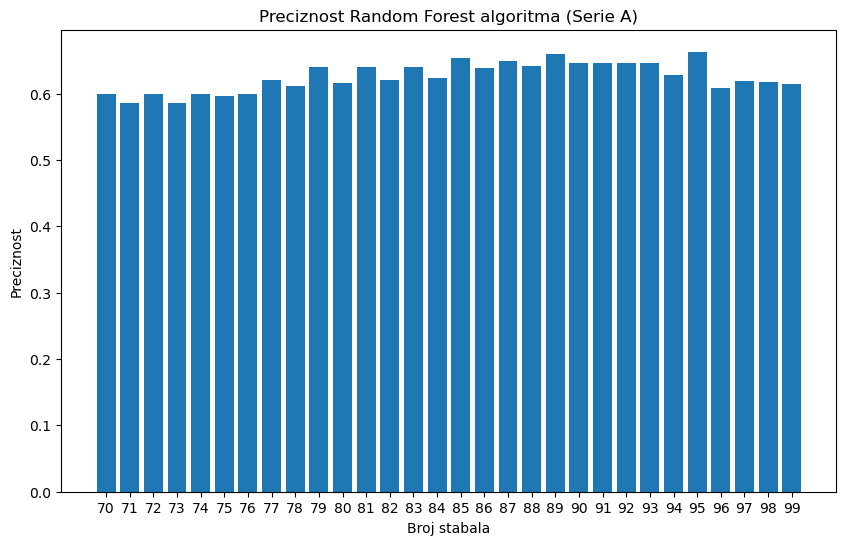

In [47]:
# 69 0.7015706806282722 1.693
# 61 0.7041884816753927 1.751
# 95 0.7172774869109948 1.906

plt.figure(figsize=(10,6))
plt.bar(range(len(precisions)), precisions, tick_label=estimators)
plt.title("Preciznost Random Forest algoritma (Serie A)")
plt.xlabel("Broj stabala")
plt.ylabel("Preciznost")
plt.xticks()
plt.savefig("preciznost_ada_seriea.png")
plt.show()

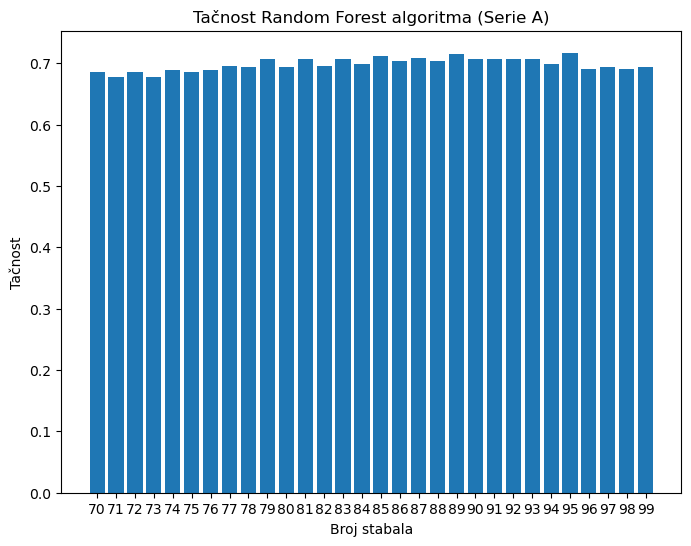

In [48]:
plt.figure(figsize=(8,6))
plt.bar(range(len(accuracies)), accuracies, tick_label=estimators)
plt.title("Tačnost Random Forest algoritma (Serie A)")
plt.xlabel("Broj stabala")
plt.ylabel("Tačnost")
plt.xticks()
plt.yticks()
plt.savefig("tacnost_ada_seriea.png")
plt.show()

In [36]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=clf.predict(test[predictors])))

In [75]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,209,33
1,90,50


In [76]:
# grouped_matches = matches.groupby("team")

In [1744]:
# def rolling_averages(group, cols, new_cols):
#     group = group.sort_values("date") # sortiraj po datumu
#     rolling_stats = group[cols].rolling(3, closed='left').mean() # uzima mean rezultata od prethodna 3 matchweek-a
#     group[new_cols] = rolling_stats
#     group = group.dropna(subset=new_cols) # uklanja nedostajuce vrijednosti
#     return group

In [1745]:
# cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
# new_cols = [f"{c}_rolling" for c in cols]

# rolling averages uzima prosjecne vrijednosti ovih kolona u protekla 3 matchweek-a i na taj nacin predvidja ishod sljedeceg meca

In [1684]:
# matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [1685]:
# matches_rolling.shape

In [1686]:
# matches_rolling = matches_rolling.droplevel('team')

In [1683]:
# matches_rolling

In [1682]:
# matches_rolling.index = range(matches_rolling.shape[0])

In [1681]:
# matches_rolling